# Data analysis with Pandas


**Lecture Overview**

1. Data exploration in Pandas
2. Data cleaning
3. Data analysis in Pandas  
  i. Univariate analysis  
  ii. Bivariate analysis
4. Special functions for analysis in pandas or otherwise


## Data Exploration

![exp](https://www.trainanddevelop.ca/wp-content/uploads/2021/08/Magnifying-glass-on-charts-graphs-spreadsheet-paper-1-scaled.jpeg)
Once a data scientist acquires the data, they have to review it before making any decisions about the data/the project. This process includes the following:
1. Loading the data
2. Check the data and datatypes.
3. Note any cleaning and/or engineering to be done.

Let's work through these steps using the following dataset:

[Student data](https://github.com/Moringa-School-Classroom/dspt-phase-1-Data_cleaning_and_analysis/blob/main/students_data.csv)

In [1]:
# Loading needed libraries
import numpy as np
import pandas as pd

**Loading data**

We load data into a data structure called a **dataframe**. A dataframe contains rows and columns; it can be easily manipulated hence appropriate for data analysis.

In [2]:
df = pd.read_csv('students_data.csv', index_col=0)
# using the index_col=0 argument avoid having the index column as unnamed:0

![#f03c15](https://placehold.co/15x15/f03c15/f03c15.png) `What other pandas functions can be used to load data?`

In [3]:
#@title
# df = pd.read_excel("data.xlsx")

# df = pd.read_json("data.json")

# df_list = pd.read_html("data.html")

# df = pd.read_pickle("data.pkl")

# from sqlalchemy import create_engine
# engine = create_engine('sqlite:///mydatabase.db')
# df = pd.read_sql_query('SELECT * FROM mytable', engine)

In [4]:
# Check if the loading was successful
df.head(5) # checks for the first 5 rows

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%
2,"JOB, NGARA",13307.0,NaN,NaN,54.0,49.0,53.0,59.0,72.0,86%,62%
3,"CHEGE DAVID, KAMAU",13258.0,NaN,NaN,71.0,97.0,92.0,41.0,81.0,77%,80%
4,"RAMADHAN MUSA, TEPO",13363.0,NaN,NaN,40.0,84.0,74.0,82.0,89.0,64%,46%


In [5]:
df.tail(5) # checks for the last 5 rows

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
142,"TIMOTHY NDEDA, OBURA",13322634.0,Elgon,0,-78.0,40.0,99.0,70.0,49.0,99&,92&
143,"MUKUHA JERIEL, NGARA",1932845.0,Cherangani,321,94.0,780.0,420.0,71.0,88.0,56%,76%
144,"JOB, KAMAU",1430232.0,Nandi,"43,200",98.0,80.0,86.0,64.0,99.0,49%,69%
145,"CHEGE, KAMAU",159.0,Nandi,NaN,508.0,409.0,77.0,58.0,56.0,88%,84%
146,"RAMADHAN, MUSA",87.0,Cherangani,NaN,81.0,70.0,64.0,680.0,88.0,76%,72%


![#f03c15](https://placehold.co/15x15/f03c15/f03c15.png) `What can you notice when previewing the data?`

**Checking the data and datatypes**

In [6]:
df.shape # checks for the number of rows and columns

(147, 11)

In [7]:
df.columns # prints out the column names

Index(['names', 'admission number', 'house', 'balance', 'english', 'kiswahili',
       'mathematics', 'science', 'sst/cre', 'Creative Arts', 'music'],
      dtype='object')

In [8]:
df.info() # checks for the overview of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             147 non-null    object 
 1   admission number  124 non-null    float64
 2   house             26 non-null     object 
 3   balance           58 non-null     object 
 4   english           121 non-null    float64
 5   kiswahili         119 non-null    float64
 6   mathematics       130 non-null    float64
 7   science           117 non-null    float64
 8   sst/cre           132 non-null    float64
 9   Creative Arts     143 non-null    object 
 10  music             147 non-null    object 
dtypes: float64(6), object(5)
memory usage: 13.8+ KB


In [9]:
df.describe() # check for a statistical summary of the data

,admission number,english,kiswahili,mathematics,science,sst/cre
count,1.240000e+02,121.000000,119.000000,130.000000,117.000000,132.000000
mean,1.473303e+05,70.958678,74.764706,72.938462,68.179487,70.833333
std,1.211743e+06,45.884710,74.971035,35.293180,60.666928,18.617142
min,8.700000e+01,-78.000000,29.000000,32.000000,28.000000,29.000000
25%,1.326200e+04,54.000000,49.500000,55.500000,46.000000,54.750000
50%,1.330650e+04,71.000000,66.000000,71.000000,66.000000,73.000000
75%,1.335625e+04,83.000000,82.500000,86.000000,79.000000,87.000000
max,1.332263e+07,508.000000,780.000000,420.000000,680.000000,100.000000


## Data preprocessing and/or Cleaning

* **Data cleaning** refers to the process of identifying and correcting or removing incorrect, incomplete, incorrectly formatted, corrupted, duplicate or irrelevant data within the provided data.

while 

* **Data preprocessing** can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process.


There is no one  way to carry out data cleaning/preprocessing because the process will differ depending on the data at hand.



### What are the different types of data issues?

* **Missing Data** - No data value is stored for an attribute in an observation hence data ends up with missing fields.
* **Duplicated Entries** - An entry that shares data with another entry.
* **Invalid Data** - This includes wrong data types and wrong data formats which in turn interferes with the analysis process.
* **Conflicting Data** - Occurs when there are same records with different attributes example grams and kgs.

### Dealing with missing values

There are various methods of dealing with missing values:

1. Drop missing values 
2. Fill/replace with mean/median/mode/, backward fill/forward fill, certain value
3. Interpolate

One selects the above methods based on a missing pattern.

What is a missing pattern?

 *   Missing completely at random (MCAR): This occurs when the probability of a value being missing is the same for all observations and is not related to any other variables in the dataset.

 *   Missing at random (MAR): This occurs when the probability of a value being missing is related to one or more other variables in the dataset, but not the variable of interest.

 *   Missing not at random (MNAR): This occurs when the probability of a value being missing is related to the variable of interest.

 * ... etc

Let's check for missing values.

In [10]:
missing_values = df.isna()
missing_values 

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,False,False,True,True,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
142,False,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False
145,False,False,False,True,False,False,False,False,False,False,False


In [11]:
# an interpretable version
df.isna().sum()

names                 0
admission number     23
house               121
balance              89
english              26
kiswahili            28
mathematics          17
science              30
sst/cre              15
Creative Arts         4
music                 0
dtype: int64

In [12]:
# a more interpretable version
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
house,121,0.823129
balance,89,0.605442
science,30,0.204082
kiswahili,28,0.190476
english,26,0.176871
admission number,23,0.156463
mathematics,17,0.115646
sst/cre,15,0.102041
Creative Arts,4,0.027211


![#c5f015](https://placehold.co/15x15/c5f015/c5f015.png) `The column house has ~82% of its values missing. Even if we are to take a guess, chances are we will most likely end up too much wrong information. Therefore, because of the amount of missing value we can safely drop the column house.`

In [13]:
df.drop('house', axis = 1, inplace = True) #Drops the column house

In [14]:
df.head(2)

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%


![#c5f015](https://placehold.co/15x15/c5f015/c5f015.png) `The column balance has ~60% of its values missing. What do you think is the best way to handle this data?`

In [15]:
# If you do have some real world knowledge about a variable,
# you can use this information when replacing data, 
# for example, it is likely that the students with missing fee balances have no balance at all
# so we can replace with zero, however, when analysing this column keep in mind that you have skewed this data point.

df['balance'].replace(np.nan, 0, inplace=True, regex=False) # replaces nan with 0

In [16]:
df.head(2)

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0,85.0,74.0,68.0,49.0,78.0,38%,86%


The columns english, **kiswahili, mathematics, science, sst/cre** are numeric columns with a very low perentage of missing values. We can replace them with the mean scores in those subjects.

In [17]:
# Write a function that replaces nulls with mean simultaneously?

In [18]:
#@title
columns =['english', 'kiswahili', 'mathematics', 'science', 'sst/cre']
def fill_numeric_missing(data, cols):
    """Simple function to replace missing values"""
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True)

fill_numeric_missing(df, columns) 

In [19]:
missing_values(df)

,Missing Values,Percentage(%)
admission number,23,0.156463
Creative Arts,4,0.027211


In [20]:
# Drop the rows where admission number is missing

In [21]:
#@title
# drop along the row using axis = 0
# specify the column using subset
df.dropna(axis = 0, subset=['admission number'], inplace=True)

In [22]:
missing_values(df)

,Missing Values,Percentage(%)
Creative Arts,4,0.032258


Columns creative arts and music have data stored in percentages. This should be numeric, however the percentage sign is restricting the data type to object.

### Fix Structural Issues

In [23]:
def remove_character(data, cols, characters):
    """simple function to remove characters"""
    # loop through the columns
    for col in cols:
        data[col] = data[col].str.strip(characters)

    return data.head()

remove_character(df, ['Creative Arts', 'music'], '%')

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0,81.0,39.0,50.0,30.0,59.0,99,80
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0,85.0,74.0,68.0,49.0,78.0,38,86
2,"JOB, NGARA",13307.0,0,54.0,49.0,53.0,59.0,72.0,86,62
3,"CHEGE DAVID, KAMAU",13258.0,0,71.0,97.0,92.0,41.0,81.0,77,80
4,"RAMADHAN MUSA, TEPO",13363.0,0,40.0,84.0,74.0,82.0,89.0,64,46


Even after removing the ```%``` sign, we still have to "explain" to the computer that this are actually numbers and not characters. 


In [24]:
# remove the & sign 
remove_character(df, ['Creative Arts', 'music'], '&')

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0,81.0,39.0,50.0,30.0,59.0,99,80
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0,85.0,74.0,68.0,49.0,78.0,38,86
2,"JOB, NGARA",13307.0,0,54.0,49.0,53.0,59.0,72.0,86,62
3,"CHEGE DAVID, KAMAU",13258.0,0,71.0,97.0,92.0,41.0,81.0,77,80
4,"RAMADHAN MUSA, TEPO",13363.0,0,40.0,84.0,74.0,82.0,89.0,64,46


When dealing with numbers, especially money, we are most likely to add the ```,``` to show thousands, millions etc. In the event we have such data, like in this case the column **balance**, the computer is going to categorize ```14,000``` as a string and not a number.

In [25]:
# remove the , character from balance
df['balance'].replace(",", "", inplace=True, regex=True) # removes ,

📝 **Note** - Setting regex as ```True``` since the value we are replacing is a string.

In [26]:
# data types
df.dtypes

names                object
admission number    float64
balance              object
english             float64
kiswahili           float64
mathematics         float64
science             float64
sst/cre             float64
Creative Arts        object
music                object
dtype: object

In [27]:
# change data types
def change_data_type(data, cols, type):
    """Simple function to change columns data type"""
    for col in cols:
        data[col] = data[col].astype(type)

    return data.dtypes # confirm the data types


change_data_type(df, ["balance", "Creative Arts", "music"], 'float')


names                object
admission number    float64
balance             float64
english             float64
kiswahili           float64
mathematics         float64
science             float64
sst/cre             float64
Creative Arts       float64
music               float64
dtype: object

In [28]:
missing_values(df)

,Missing Values,Percentage(%)
Creative Arts,4,0.032258


In [29]:
# specify the column using subset
df.dropna(axis = 0, subset=['Creative Arts'], inplace=True)
missing_values(df)

,Missing Values,Percentage(%)


### Removal of Duplicate and Unwanted Observations

* **Duplicated Entries** - Complete carbon copy of rows or column values. 
* **Unwanted observations** - Irrelevant data records that don’t actually fit the specific problem you are trying to analyze or solve

In [30]:
# Identify duplicate data
duplicate_rows = df[df.duplicated()]
duplicate_rows

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
62,"MSHINDI DANIEL, OUMA",13367.0,24463.0,78.0,29.0,50.0,62.0,50.0,86.0,53.0
88,"MUENDO CICILY, MUTHEU",13283.0,0.0,43.0,60.0,48.0,94.0,97.0,69.0,45.0
100,"JERIEL NDEDA, OBURA",13259.0,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0
101,"MUKUHA TIMOTHY, KAMAU",13243.0,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0
102,"JOB, NGARA",13307.0,0.0,54.0,49.0,53.0,59.0,72.0,86.0,62.0
103,"CHEGE DAVID, KAMAU",13258.0,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0
104,"RAMADHAN MUSA, TEPO",13363.0,0.0,40.0,84.0,74.0,82.0,89.0,64.0,46.0
105,"MUENDO CICILY, MUTHEU",13283.0,0.0,43.0,60.0,48.0,94.0,97.0,69.0,45.0


In [31]:
# Usefule addition:
df.duplicated().sum() #counts duplicated data

8

In [32]:
# Also, if you want to be specific to a row:
df.duplicated(['names', 'admission number']).sum()

8

In [33]:
print(df.duplicated(['admission number']).sum())
print(df.duplicated(['admission number']).sum()/df.shape[0])

32
0.26666666666666666


We handle duplicates in two ways:

1. Removing duplicates
2. Keeping them

This is dependent on the amount and type of data.

From above, we can clearly point out that 24 students have the same admission number, which practically is not possible as each student is required to have a unique admission number. What do you think you should do?

In [34]:
# handling the duplicates 
# remove duplicated rows
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.duplicated().sum() 

0

### Outliers

![outliers](https://www.researchgate.net/publication/10633674/figure/fig5/AS:267602974998545@1440812929396/A-normal-distribution-with-outliers-showing-the-relative-positions-of-the-mean-median_Q640.jpg)

Outliers are extreme data points that vary immensely from the other points. They are the hardest to detect using ones eye among other data inaccuracies within the data in the sense that they are often of the same type as the other observations. Therefore, it is important to understand that just because they exist, doesn’t mean they are incorrect and as such, there should be a valid reason to remove these data points.

Because of the data that we have we are going to use "unconventional" techniques to handle this outliers.

```Z-score``` and ```IQR``` are common techniques used for identifying and removing outliers. However, ```boxplot``` are the easiest to utilise when visualizing outliers.

Understanding boxplots:
![boxplot](https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png)

📝 _Just because they exist, doesn't mean they are wrong_.


<AxesSubplot: >

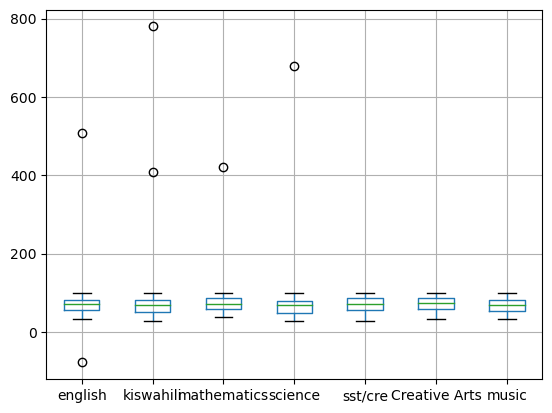

In [35]:
# we can also use a box plot to identify outliers
scores_columns = ['english', 'kiswahili', 'mathematics', 'science', 'sst/cre', 'Creative Arts', 'music']
df.boxplot(column=scores_columns)  

In [36]:
# More precisely, we can visualize using one column
df.boxplot(column='english')  

<AxesSubplot: >

In [37]:
# Getting outliers
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


english_outliers = IQR_outliers(df, "english")
english_outliers[0]

[-78.0, 508.0]

In [38]:
# Dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    """Simple function to remove the ouliers"""
    # get values from previous function 
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

In [39]:
# Removing simultaneously
for i in scores_columns:
  df = IQR_remove_outliers(df, i)

In [40]:
# confirm using a box plot
#df.boxplot(column=scores_columns)  

As much as the above balances are categorised as outliers, its practically possible to have such balances since they are not that extreme.

Do you think we should remove them?

What happens when the data is normally distributed?

In this scenario, we can determine the quartile from mean and median.

```Q1 = mean - 0.675 * stdev```
```Q3 = mean + 0.675 * stdev```

```Upper Limit = Q3 + 1.5 * IQR = mean + 2.7 * stdev```
```Lower Limit = Q1 - 1.5 * IQR = mean - 2.7 * stdev```

Alternatively, we can use the Z-score, preferably when the data is normally distributed.

### Final Data

In [41]:
# preview first 5 columns
df.head()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0
2,"JOB, NGARA",13307.0,0.0,54.0,49.0,53.0,59.0,72.0,86.0,62.0
3,"CHEGE DAVID, KAMAU",13258.0,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0
4,"RAMADHAN MUSA, TEPO",13363.0,0.0,40.0,84.0,74.0,82.0,89.0,64.0,46.0


In [42]:
# preview last 5 columns
df.tail()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
115,"Bin Amin, Ng'eno",13159.0,0.0,58.000000,74.764706,72.938462,68.179487,70.833333,51.0,44.0
116,"Catherine Ndung'u, Kate",13187.0,0.0,84.000000,74.764706,68.000000,68.179487,48.000000,91.0,64.0
117,"Daisy Machoka, Daniel",13168.0,18161.0,70.958678,74.764706,72.938462,68.179487,70.833333,78.0,86.0
118,"Daniel Karanja, Wambui",13133.0,33619.0,78.000000,74.764706,78.000000,68.179487,29.000000,80.0,84.0
144,"JOB, KAMAU",1430232.0,43200.0,98.000000,80.000000,86.000000,64.000000,99.000000,49.0,69.0


## Data analysis in Pandas

### Univariate analysis

In [43]:
# For categorical variables

# 1. Get frequency tables and plot value counts: choose appropriate visualizations eg barplots or pie charts
# 2. State observations or summarize findings

In [44]:
# Example 
# Creating our dataframe
iris_df = pd.read_csv('http://bit.ly/IrisDataset')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris_df.species.value_counts() # Frequency table

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [46]:
iris_df.species.value_counts().plot.bar()

<AxesSubplot: >

In [47]:
# For numerical variables

# 1. Calculate measures of central tendency, dispersion and other statistics such as skewness and kurtosis.
# 2. Interpret the results/numbers you get.
# 3. Plot distribution

# Perform normality tests if you want to work on modelling(Helps inform the choice of algorithm)

In [48]:
# Mean
print('Mean:', iris_df["petal_length"].mean())

# Median
print('Median:', iris_df["petal_length"].median())

Mean: 3.758666666666666
Median: 4.35


In [49]:
# Visualizing
iris_df["petal_length"].hist()

<AxesSubplot: >

![#f03c15](https://placehold.co/15x15/f03c15/f03c15.png) `Do univariate analysis on the students data. How did the students perform in different subjects?`

### Bivariate analysis

In [61]:
# When both variables are categorical

# 1. Plot grouped-by value counts.
# 2. State observations or summarize findings
import matplotlib.pyplot as plt
%matplotlib inline

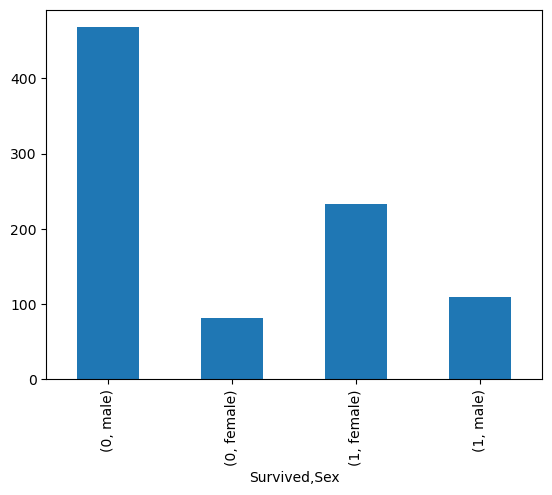

In [62]:
# Example:
titanic = pd.read_csv("titanic.csv")

# Changing to categorical variable
cat = ['Pclass', 'Sex', 'Embarked','Survived']
for i in cat:
    titanic[i] = titanic[i].astype('category')

# Group the data by gender and survival rate
gender_survival = titanic.groupby('Survived')['Sex'].value_counts()

# Create a bar chart of the survival rate by gender
gender_survival.plot.bar();

In [52]:
# When variables are categorical and numerical

# 1. Plot box-plots or bar plots of each category.
# 2. State observations or summarize findings

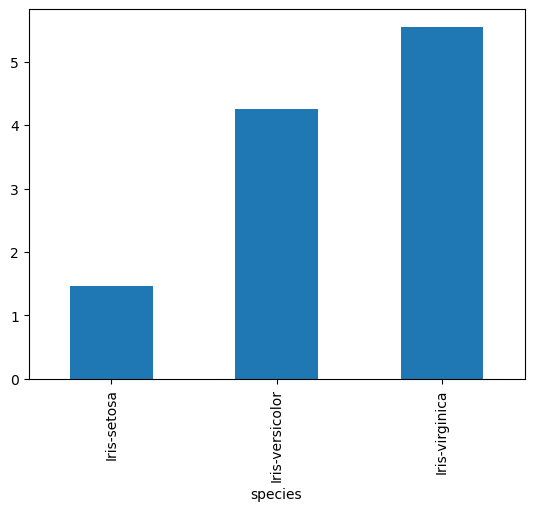

In [63]:
# Group the data by class and calculate the survival rate
petals = iris_df.groupby('species')['petal_length'].mean()

petals.plot.bar();

In [64]:
# When both variables are numerical

# 1. Plot scatterplots and calculate correlation.
# 2. State observatidata[col].replace(to_replace, value, inplace=True, regex=regex_value)ons or summarize findings

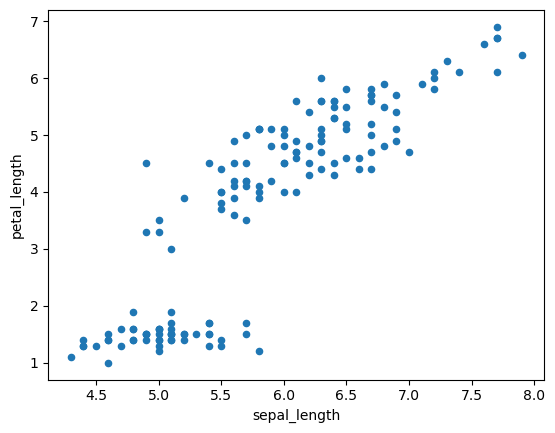

In [65]:
iris_df.plot.scatter(x='sepal_length',y ='petal_length' ); # Plots a scatter plot

In [66]:
iris_df.corr() # Gets the correlation matrix

C:\Users\Hp\AppData\Local\Temp\ipykernel_2800\2029855612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr() # Gets the correlation matrix


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


![#f03c15](https://placehold.co/15x15/f03c15/f03c15.png) `Do bivariate analysis on the students data. Come up with your own analysis questions.`

## Special functions for analysis in pandas or otherwise

## Using Lambda functions

What is a lambda function?

Refers to an anonymous function (ie a function definition that is not bound to an identifier unless assigned one) intended as a shorthand function. 

They come in handy since one doesn't have to write multiple lines of code defining a function, and they are written inline.

### using ```.apply()```

In [67]:
# using lamda function to remove the decimals in the scores that resulted from replacing with mean
deci_columns = ["english", "kiswahili", "mathematics","science", "sst/cre"]

for col in deci_columns:
    df[col] = df[col].apply(lambda x: np.trunc(x))

# preview the data
df.tail()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music,Total
115,"Bin Amin, Ng'eno",13159.0,0.0,58.0,74.0,72.0,68.0,70.0,51.0,44.0,437.0
116,"Catherine Ndung'u, Kate",13187.0,0.0,84.0,74.0,68.0,68.0,48.0,91.0,64.0,497.0
117,"Daisy Machoka, Daniel",13168.0,18161.0,70.0,74.0,72.0,68.0,70.0,78.0,86.0,518.0
118,"Daniel Karanja, Wambui",13133.0,33619.0,78.0,74.0,78.0,68.0,29.0,80.0,84.0,491.0
144,"JOB, KAMAU",1430232.0,43200.0,98.0,80.0,86.0,64.0,99.0,49.0,69.0,545.0


In [68]:
df.dtypes

names                object
admission number    float64
balance             float64
english             float64
kiswahili           float64
mathematics         float64
science             float64
sst/cre             float64
Creative Arts       float64
music               float64
Total               float64
dtype: object

### using ```.assign()```

In [69]:
# lets find the students total
df = df.assign(Total = lambda x: x["english"] + x["kiswahili"] + x["mathematics"] + x["science"] + x["sst/cre"] + x["Creative Arts"] + x["music"])

In [70]:
df.head()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music,Total
0,"JERIEL NDEDA, OBURA",13259.0,0.0,81.0,39.0,50.0,30.0,59.0,99.0,80.0,438.0
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0.0,85.0,74.0,68.0,49.0,78.0,38.0,86.0,478.0
2,"JOB, NGARA",13307.0,0.0,54.0,49.0,53.0,59.0,72.0,86.0,62.0,435.0
3,"CHEGE DAVID, KAMAU",13258.0,0.0,71.0,97.0,92.0,41.0,81.0,77.0,80.0,539.0
4,"RAMADHAN MUSA, TEPO",13363.0,0.0,40.0,84.0,74.0,82.0,89.0,64.0,46.0,479.0
